In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

In [4]:
df = pd.read_csv("sales_data_sample.csv", encoding='latin1')

In [5]:
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
X = df[numeric_cols]

In [6]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [7]:
wcss = []   # Within Cluster Sum of Squares
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

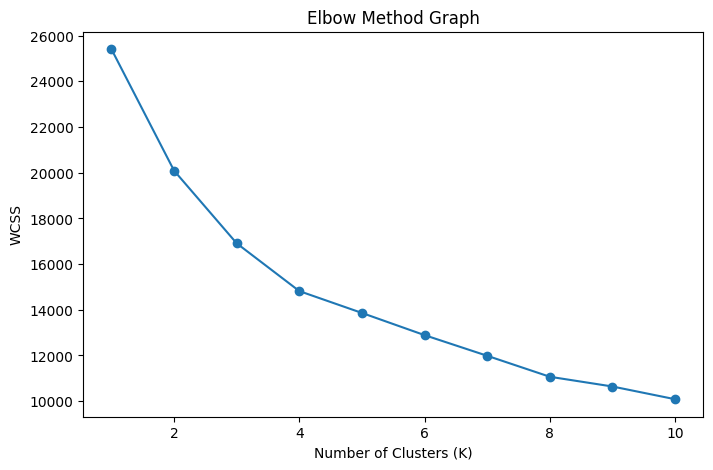

In [8]:
plt.figure(figsize=(8,5))
plt.plot(range(1, 11), wcss, marker='o')
plt.title("Elbow Method Graph")
plt.xlabel("Number of Clusters (K)")
plt.ylabel("WCSS")
plt.show()

In [9]:
k = 4  # choose based on elbow plot
kmeans = KMeans(n_clusters=k, random_state=42)
df['KMeans_Cluster'] = kmeans.fit_predict(X_scaled)
print("\nK-Means Clustering result:")
df.head()


K-Means Clustering result:


,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE,KMeans_Cluster
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,...,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small,2
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,...,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small,2
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,...,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium,2
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,...,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium,1
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,...,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium,1


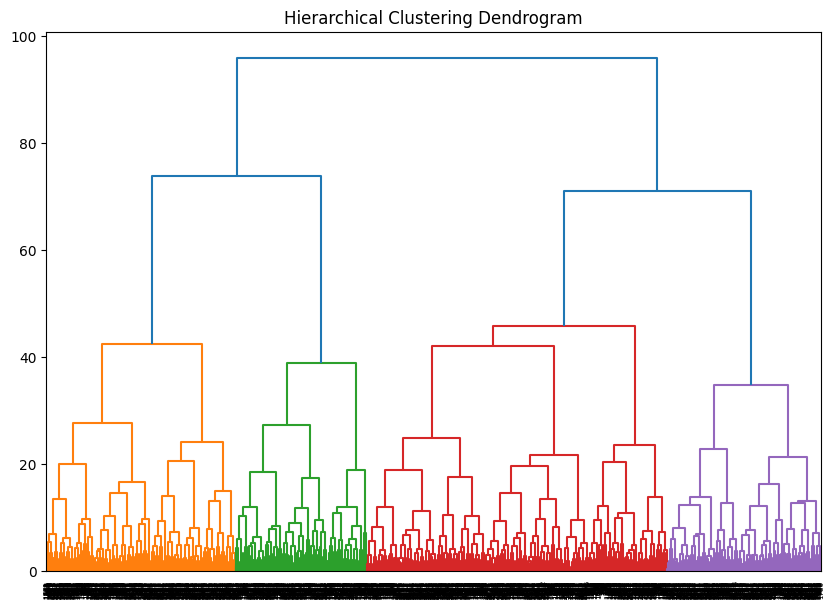


Hierarchical Clustering result:
   ORDERNUMBER  QUANTITYORDERED  PRICEEACH  ORDERLINENUMBER    SALES  \
0        10107               30      95.70                2  2871.00   
1        10121               34      81.35                5  2765.90   
2        10134               41      94.74                2  3884.34   
3        10145               45      83.26                6  3746.70   
4        10159               49     100.00               14  5205.27   

         ORDERDATE   STATUS  QTR_ID  MONTH_ID  YEAR_ID  ...           CITY  \
0   2/24/2003 0:00  Shipped       1         2     2003  ...            NYC   
1    5/7/2003 0:00  Shipped       2         5     2003  ...          Reims   
2    7/1/2003 0:00  Shipped       3         7     2003  ...          Paris   
3   8/25/2003 0:00  Shipped       3         8     2003  ...       Pasadena   
4  10/10/2003 0:00  Shipped       4        10     2003  ...  San Francisco   

   STATE POSTALCODE COUNTRY TERRITORY CONTACTLASTNAME CONTACTFIRS

In [11]:
# 6. Hierarchical Clustering
linked = linkage(X_scaled, method='ward')

plt.figure(figsize=(10, 7))
dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=True)
plt.title('Hierarchical Clustering Dendrogram')
plt.show()

# Assign clusters (cut dendrogram at k clusters)
df['Hier_Cluster'] = fcluster(linked, k, criterion='maxclust')
print("\nHierarchical Clustering result:")
print(df.head())